<a href="https://colab.research.google.com/github/MeretKhadour/ClassificationWDE/blob/main/WDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code imports the necessary libraries for machine learning in Python. Specifically, it imports libraries for working with data such as pandas and numpy, as well as libraries for data processing such as StandardScaler. Additionally, it imports various machine learning models such as LogisticRegression, GaussianNB, DecisionTreeClassifier, SVC, and KNeighborsClassifier. It also imports various metrics for evaluating model performance such as accuracy_score, precision_score, recall_score, f1_score, and confusion_matrix. Finally, it imports libraries for visualizing data such as matplotlib.pyplot and seaborn, as well as a library for oversampling data called RandomOverSampler. It also imports a class for performing grid search (GridSearchCV) and a class for displaying decision boundaries (DecisionBoundaryDisplay).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay

This Python code loads the breast cancer dataset using the load_breast_cancer function from the sklearn.datasets module. It then splits the dataset into training and testing sets using the train_test_split function from the sklearn.model_selection module. The training set contains 70% of the data, while the testing set contains 30% of the data.

The code then normalizes the features in the training and testing sets using the StandardScaler class from the sklearn.preprocessing module. This is done to ensure that all features are on a similar scale, which can help improve model performance.

Finally, the code oversamples the training data using the RandomOverSampler class from the imblearn.over_sampling module. This is done to address class imbalance in the dataset, which can negatively impact model performance. The oversampled training data is stored in X_train_resampled and y_train_resampled.


In [ ]:

# Load the dataset and split into training and testing sets
data = load_breast_cancer()

# Print the description of the dataset
print(data.DESCR)

print ("the feature names: ")
print( data.feature_names)
print ("the target names: ")

print(data.target_names)
# Check for any missing values

df = pd.DataFrame(data.data, columns=data.feature_names)
print("sum of missing data = " )

print((df.isnull().sum()))

df = df.dropna()
#Printing Entry Reduction
print("Total Original Entry Count =",len(df))
print("Total Null Entry Drop Count =",len(df))
print("Total Non-Null Entry Count =",len(df)-len(df))

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Normalize the features to ensure fair comparison across algorithms.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Oversample the data.
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

This Python code trains a classification algorithm on the training data using five different models: LogisticRegression, GaussianNB, DecisionTreeClassifier, SVC, and KNeighborsClassifier. The models are stored in a list called models, and the names of the models are stored in a list called model_names.

The code then uses a for loop to iterate over each model in the models list. For each model, it calls the fit method to train the model on the resampled training data (X_train_resampled and y_train_resampled).

In [ ]:
# Train classification algorithm on the training data.
models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), SVC(probability=True), KNeighborsClassifier(26)]
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'SVM', 'KNN']
for i in range(len(models)):
    models[i].fit(X_train_resampled, y_train_resampled)




This Python code evaluates the performance of the trained models on the testing data using various evaluation measures. The following measures are used:

Accuracy: The proportion of correctly classified samples out of the total number of samples.
Precision: The proportion of true positives out of the total number of positive predictions.
Recall: The proportion of true positives out of the total number of actual positives.
F1-score: The harmonic mean of precision and recall.
Confusion Matrix: A table that summarizes the number of true positives, false positives, true negatives, and false negatives.
ROC curve and AUC: A graphical representation of the trade-off between true positive rate and false positive rate for different classification thresholds.
The code uses a for loop to iterate over each model in the models list. For each model, it calculates and prints the accuracy, precision, recall, and F1-score using functions from the sklearn.metrics module. It also calculates and prints the confusion matrix using the confusion_matrix function from the same module.

Finally, it plots the ROC curve for each model using functions from the sklearn.metrics and matplotlib.pyplot modules. The area under the curve (AUC) is also calculated and displayed in the legend.

Model: Logistic Regression
Accuracy: 0.9824561403508771
Precision: 0.9906542056074766
Recall: 0.9814814814814815
F1-score: 0.986046511627907
Confusion Matrix:
[[ 62   1]
 [  2 106]]
---------------------------------------------------------
Model: Naive Bayes
Accuracy: 0.935672514619883
Precision: 0.944954128440367
Recall: 0.9537037037037037
F1-score: 0.9493087557603688
Confusion Matrix:
[[ 57   6]
 [  5 103]]
---------------------------------------------------------
Model: Decision Tree
Accuracy: 0.9239766081871345
Precision: 0.9523809523809523
Recall: 0.9259259259259259
F1-score: 0.9389671361502347
Confusion Matrix:
[[ 58   5]
 [  8 100]]
---------------------------------------------------------
Model: SVM
Accuracy: 0.9707602339181286
Precision: 0.9813084112149533
Recall: 0.9722222222222222
F1-score: 0.9767441860465117
Confusion Matrix:
[[ 61   2]
 [  3 105]]
---------------------------------------------------------
Model: KNN
Accuracy: 0.9590643274853801
Precision: 0.963302752293578


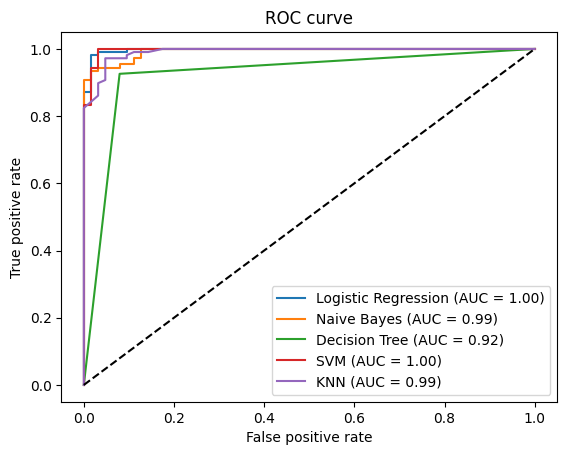

In [ ]:

# Evaluate the models on the testing data using the following evaluation measures:
# - Accuracy
# - Precision, Recall, F1-score
# - Confusion Matrix
# - ROC curve and AUC

for i in range(len(models)):
    print(f"Model: {model_names[i]}")
    y_pred = models[i].predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print("---------------------------------------------------------")
    fpr, tpr, _ = roc_curve(y_test, models[i].predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


This Python code creates a heatmap to visualize the confusion matrix for each algorithm. The code uses a for loop to iterate over each model in the models list. For each model, it calculates the confusion matrix using the confusion_matrix function from the sklearn.metrics module. It then plots the confusion matrix as a heatmap using the sns.heatmap function from the seaborn module.
The heatmap shows the predicted labels on the x-axis and the true labels on the y-axis. The color of each cell in the heatmap represents the number of samples that fall into that category. The diagonal cells represent correct predictions, while off-diagonal cells represent incorrect predictions.


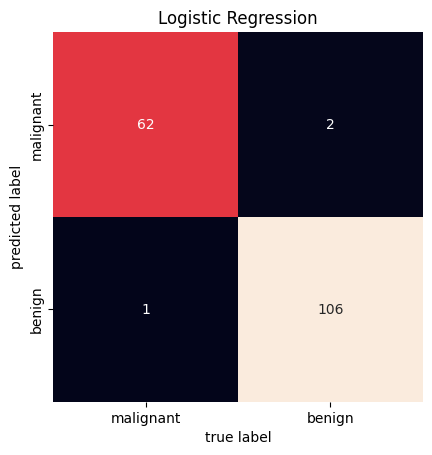

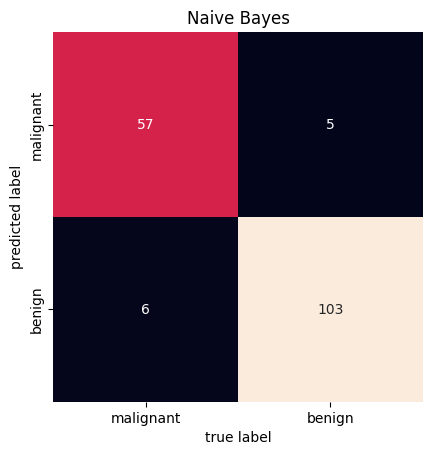

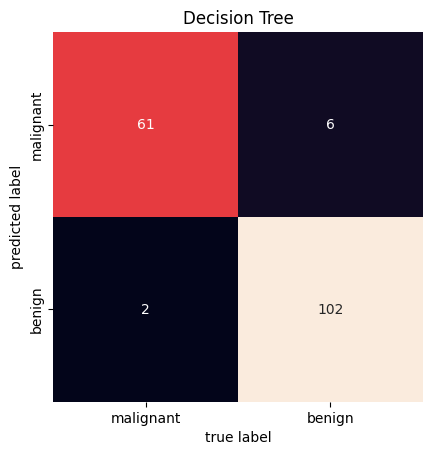

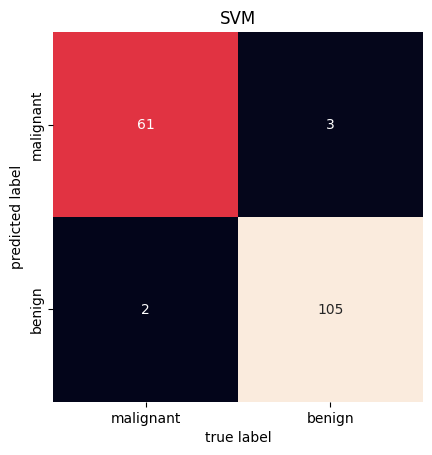

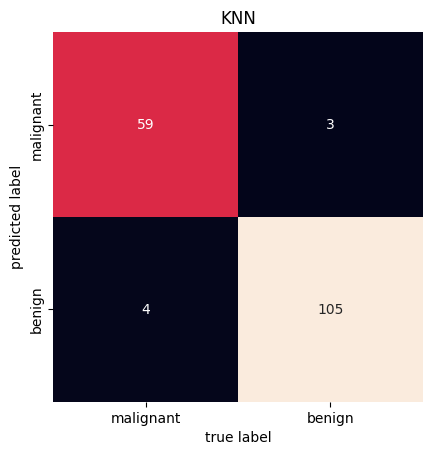

In [ ]:

# Create a heatmap to visualize the confusion matrix for each algorithm.
for i in range(len(models)):
    plt.figure()
    cm = confusion_matrix(y_test, models[i].predict(X_test))
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=data.target_names,
                yticklabels=data.target_names)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title(model_names[i])
plt.show()

This Python code creates a scatter plot with two selected features and compares the decision boundaries of different algorithms. The code uses a for loop to iterate over each model in the models list. For each model, it creates a scatter plot of the data points using the first two features. It then trains the model on the resampled training data (X_train_resampled and y_train_resampled) and plots the decision boundaries using the predict method and a meshgrid of points.
The code also sets the x-axis and y-axis limits based on the minimum and maximum values of the two selected features. Finally, it adds a title to each plot indicating the name of the model.


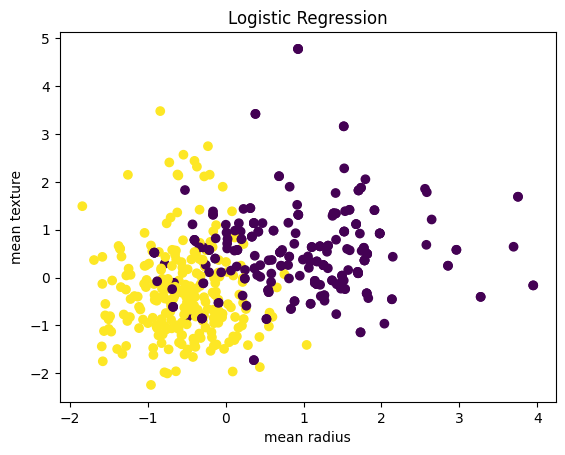

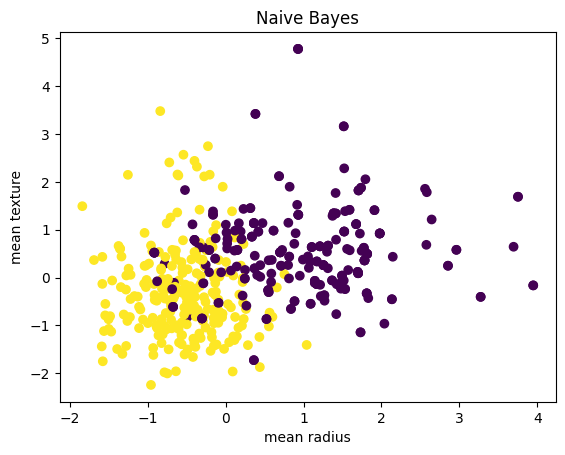

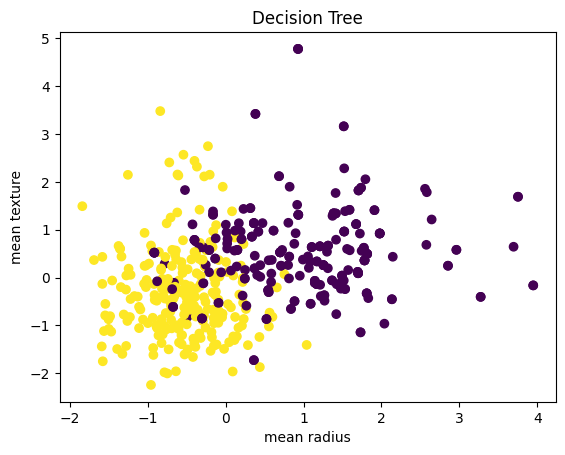

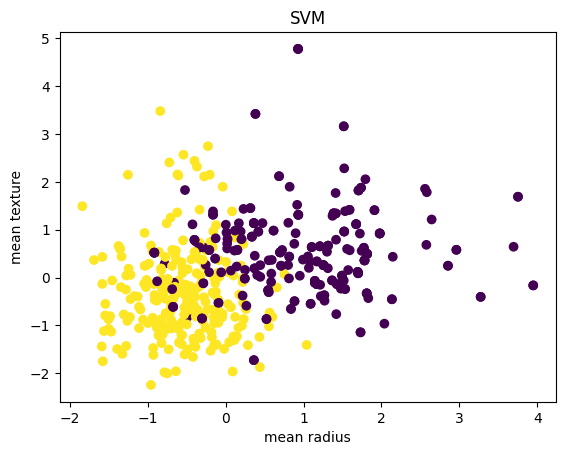

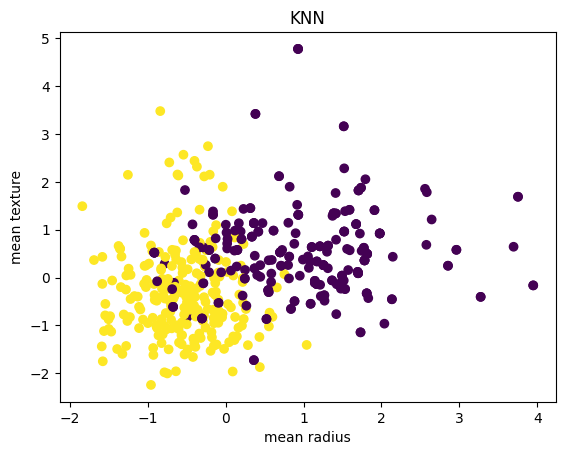

In [ ]:
# Compare the decision boundaries of different algorithms using a scatter plot with two selected features.
features_idx = [0, 1]

for i in range(len(models)):
    plt.figure()
    X_2d = X_train_resampled[:, features_idx]
    model = models[i]
    model.fit(X_2d,y_train_resampled)

    # Plotting decision regions
    x_min,x_max=X_2d[:,0].min()-1,X_2d[:,0].max()+1
    y_min,y_max=X_2d[:,1].min()-1,X_2d[:,1].max()+1

    xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max,.01))

    Z=model.predict(np.c_[xx.ravel(),yy.ravel()])

    Z=Z.reshape(xx.shape)

    #plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm_r)

    # Plotting scatter plot of data points
    plt.scatter(X_2d[:,0],X_2d[:,1],c=y_train_resampled)

    plt.xlabel(data.feature_names[features_idx[0]])
    plt.ylabel(data.feature_names[features_idx[1]])

    plt.title(model_names[i])

plt.show()

This Python code tunes the hyperparameters of each classification algorithm to optimize their performance. The code uses a for loop to iterate over each model in the models dictionary. For each model, it performs a grid search using the GridSearchCV class from the sklearn.model_selection module to find the best hyperparameters based on cross-validation.

The code then evaluates the performance of the tuned model on the testing data using various evaluation measures, including accuracy, precision, recall, F1-score, and confusion matrix. It also plots the ROC curve and calculates the AUC.

Tuned Logistic Regression:
Accuracy: 0.9824561403508771
Precision: 0.9906542056074766
Recall: 0.9814814814814815
F1-score: 0.986046511627907
Confusion Matrix:
[[ 62   1]
 [  2 106]]
ROC curve and AUC: 0.9828042328042328

-------------------------------------------
Tuned Naive Bayes:
Accuracy: 0.935672514619883
Precision: 0.944954128440367
Recall: 0.9537037037037037
F1-score: 0.9493087557603688
Confusion Matrix:
[[ 57   6]
 [  5 103]]
ROC curve and AUC: 0.9292328042328043

-------------------------------------------
Tuned Decision Tree:
Accuracy: 0.9590643274853801
Precision: 0.9719626168224299
Recall: 0.9629629629629629
F1-score: 0.9674418604651163
Confusion Matrix:
[[ 60   3]
 [  4 104]]
ROC curve and AUC: 0.9576719576719575

-------------------------------------------
Tuned Support Vector Machine (SVM):
Accuracy: 0.9824561403508771
Precision: 0.981651376146789
Recall: 0.9907407407407407
F1-score: 0.9861751152073732
Confusion Matrix:
[[ 61   2]
 [  1 107]]
ROC curve and AUC: 0.9794973

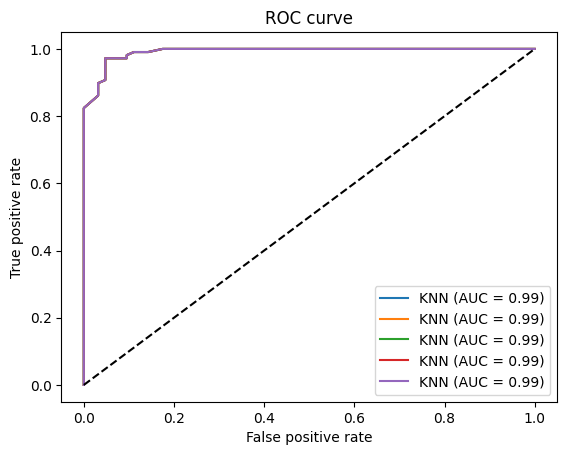

In [ ]:
# Experiment with hyperparameter tuning for each classification algorithm to optimize their performance.
models_after_tunning = []
params = {
    'Logistic Regression': {'C': [0.1, 1.0]},
    'Naive Bayes': {'var_smoothing': [1e-9]},
    'Decision Tree': {'max_depth': [2, 4]},
    'Support Vector Machine (SVM)': {'C': [0.1, 1.0], 'kernel': ['linear', 'rbf']},
    'k-Nearest Neighbors (KNN)': {'n_neighbors': [3, 5]}
}
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (SVM)': SVC(),
    'k-Nearest Neighbors (KNN)': KNeighborsClassifier()
}
for name in models.keys():
    grid_search = GridSearchCV(models[name], params[name], cv=5)
    grid_search.fit(X_train, y_train)

    # Evaluate each tuned model on the testing data using evaluation measures.
    print(f'Tuned {name}:')

    tuned_model = grid_search.best_estimator_
    models_after_tunning.append(tuned_model)
    tuned_model.fit(X_train, y_train)

    y_pred_tuned = tuned_model.predict(X_test)

    print(f'Accuracy: {accuracy_score(y_test, y_pred_tuned)}')
    print(f'Precision: {precision_score(y_test, y_pred_tuned)}')
    print(f'Recall: {recall_score(y_test, y_pred_tuned)}')
    print(f'F1-score: {f1_score(y_test, y_pred_tuned)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_tuned)}')

    # ROC curve and AUC.
    fpr_tuned, tpr_tuned, _tuned = roc_curve(y_test, y_pred_tuned)

    roc_auc_tuned = auc(fpr_tuned,tpr_tuned)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')
    print(f'ROC curve and AUC: {roc_auc_tuned}\n')
    print("-------------------------------------------")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

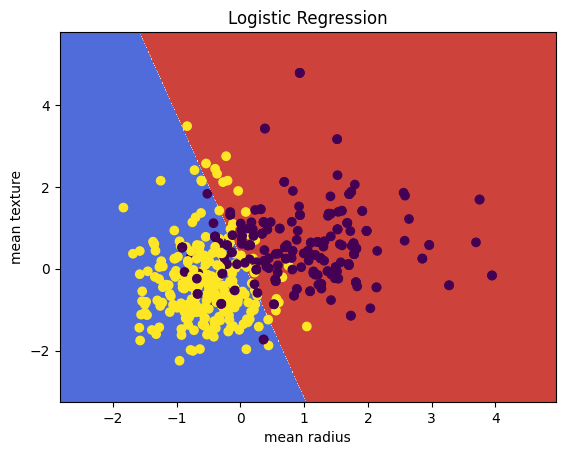

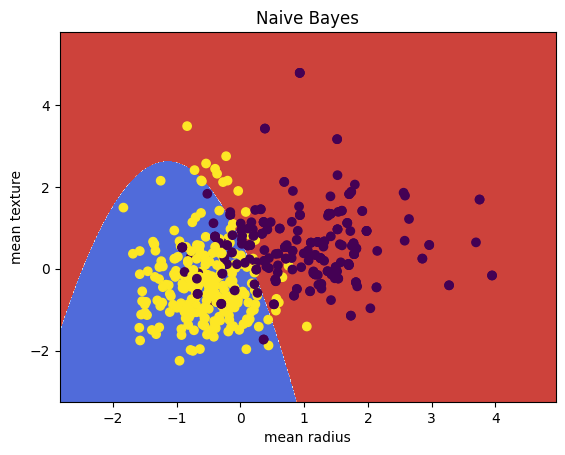

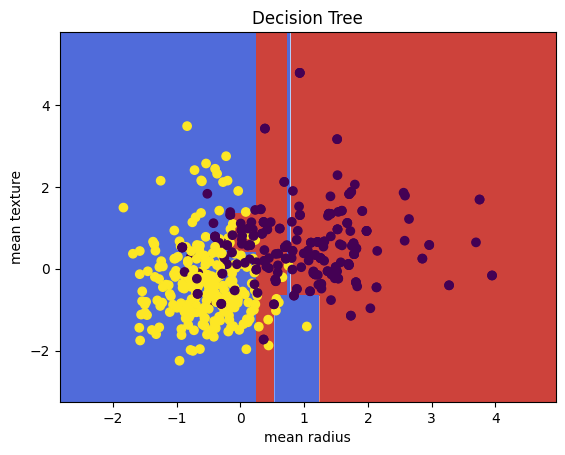

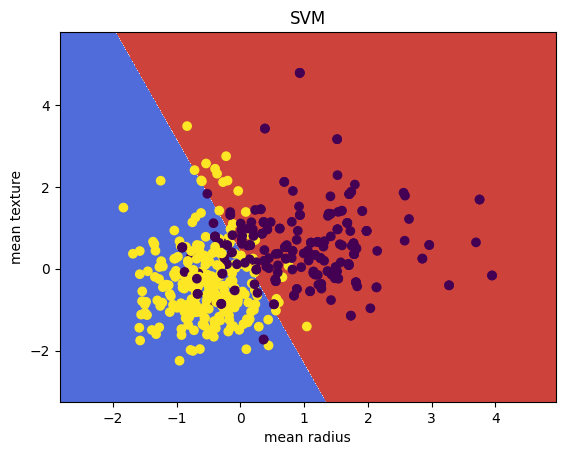

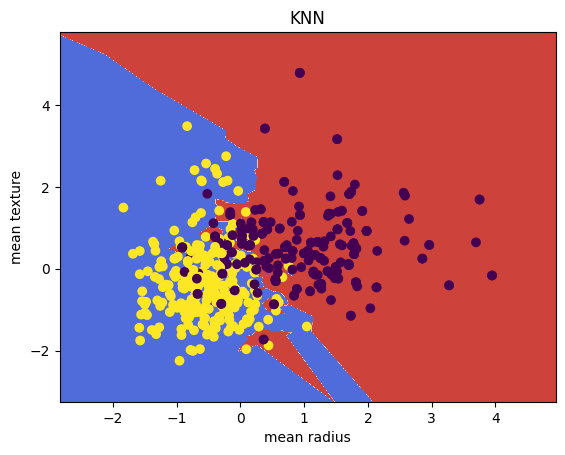

In [ ]:
# Create a meshgrid of points to plot the decision boundary

features_idx = [0, 1]

for i in range(len(models_after_tunning)):
    plt.figure()
    X_2d = X_train_resampled[:, features_idx]
    model = models_after_tunning[i]
    model.fit(X_2d,y_train_resampled)

    # Plotting decision regions
    x_min,x_max=X_2d[:,0].min()-1,X_2d[:,0].max()+1
    y_min,y_max=X_2d[:,1].min()-1,X_2d[:,1].max()+1

    xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max,.01))

    Z=model.predict(np.c_[xx.ravel(),yy.ravel()])

    Z=Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm_r)

    # Plotting scatter plot of data points
    plt.scatter(X_2d[:,0],X_2d[:,1],c=y_train_resampled)

    plt.xlabel(data.feature_names[features_idx[0]])
    plt.ylabel(data.feature_names[features_idx[1]])
    plt.title(model_names[i])
plt.show()

